In [15]:
# -*- coding: utf-8 -*-

%matplotlib inline

from __future__ import division
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import csv
import numpy as np

<p style="font-family:courier;">1. Open the file with de zones and its features. We can select  Zonas_kmeans.csv or Zonas_dbscan.csv with the zones of differents clustering algorithms. We choose the results of DBScan due to the  results its graphic representation.</p>

In [16]:
file_name = '../Data/Zones_dbscan.csv'

f = open(file_name, 'r')
csvfile = csv.reader(f)
caracteristicas = csvfile.next()[1:]
zonas = []

for zona in csvfile:
    zonas.append(map(int, zona))

<p style="font-family:courier;">2. Normalize the dataset</p>

In [17]:
min_max_scaler = MinMaxScaler()
zonas_norm = min_max_scaler.fit_transform([zona[1:] for zona in zonas])

<p style="font-family:courier;">3. Reduce the dimensionality of the data</p>

In [18]:
pca_estimator = PCA(n_components = 2)
X_pca = pca_estimator.fit_transform(zonas_norm)

print 'Variance explained by each varaible: ' + str(pca_estimator.explained_variance_ratio_)
print 'Total variance explained: ' + str(sum(pca_estimator.explained_variance_ratio_))

Variance explained by each varaible: [ 0.73588261  0.15884344]
Total variance explained: 0.894726051908


<p style="font-family:courier;">4. Plot the PCA</p>
<p style="font-family:courier;">4.1. Plot the raw results of the PCA</p>

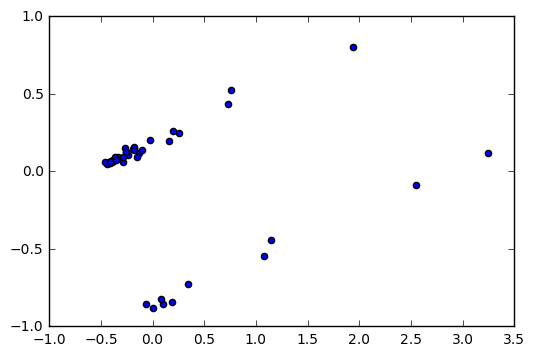

In [19]:
plt.scatter([x[0] for x in X_pca], [x[1] for x in X_pca])
plt.show()

<p style="font-family:courier;">4.2. Plot of the results centered in the core of points</p>

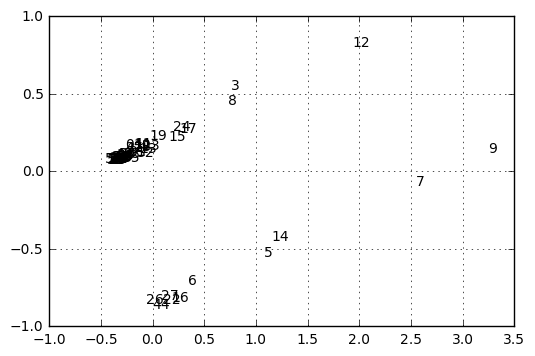

In [20]:
fig, ax = plt.subplots()
ax.grid(True)
plt.xlim(-1, 3.5)
plt.ylim(-1, 1)

N = len(X_pca)
numbers = np.arange(len(X_pca))

for i in range(N):
    plt.text(X_pca[i][0], X_pca[i][1], numbers[i])

plt.show()

<p style="font-family:courier;">5. Hierarchical clustering of the zones.</p>

In [21]:
import sklearn.neighbors
from scipy import cluster 

zona_peligrosa = zonas[11]
indice_out = 11
zonas = zonas[:11] + zonas[12:]
X_pca = np.concatenate((X_pca[:11], X_pca[12:]))

<p style="font-family:courier;">5.1. Calculate the distance matrix with Euclidean distance</p>

In [22]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)

clusters = cluster.hierarchy.linkage(matsim, method = 'complete')

<p style="font-family:courier;">6. Plot the dendogram with a threshold of 1.3 for visualize the clusters</p>

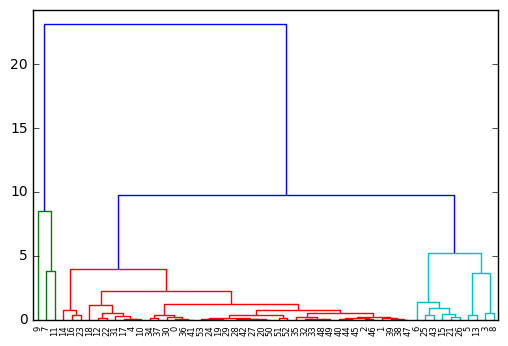

In [23]:
cut = 9
cluster.hierarchy.dendrogram(clusters, color_threshold = cut)
plt.show()

<p style="font-family:courier;">7. Cut the dendogram in the distance of 1.3</p>

In [24]:
labels = cluster.hierarchy.fcluster(clusters, cut, criterion='distance')
unique_labels = set(labels)
print 'Number of clusters %d' % len(unique_labels)

Number of clusters 3


<p style="font-family:courier;">8. Plot the results of the hierarchical clustering over the PCA points.</p>

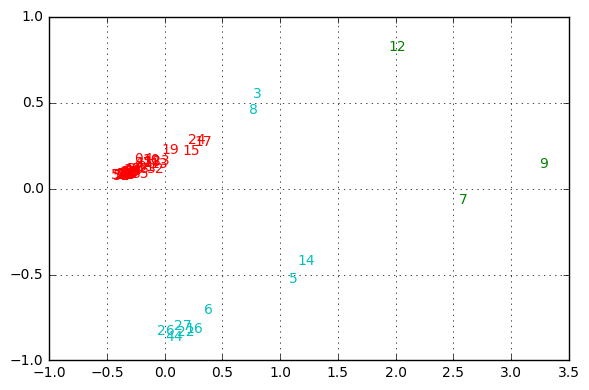

In [25]:
colors = np.array(list('bgrcmykbgrcmykbgrcmykbgrcmyk'))
colors = np.hstack([colors] * 20)

fig, ax = plt.subplots()

plt.xlim(-1, 3.5)
plt.ylim(-1, 1)
ax.grid(True)

for i in range(len(zonas)):
    plt.text(X_pca[i][0], X_pca[i][1], i if i < indice_out else i + 1, color = colors[labels[i]])

fig.tight_layout()
plt.show()

<p style="font-family:courier;">9. Characterize the obtain groups with maximum, minimum and average of the zones features of each group.</p>

In [26]:
zone_groups = dict()

for i, zona in enumerate(zonas):
    if labels[i] in zone_groups:
        zone_groups[labels[i]].append(zona)
    else:
        zone_groups[labels[i]] = [zona]

features = []

for key in zone_groups:
    zone_feature = []
    for i in range(1, len(zone_groups[key][0])):
        feature = [zone[i] for zone in zone_groups[key]]
        maxi = max(feature)
        mini = min(feature)
        aver = sum(feature) / len(feature)
        zone_feature.append(maxi)
        zone_feature.append(mini)
        zone_feature.append(round(aver,2))
    features.append(zone_feature)
features.sort()

<p style="font-family:courier;">10. Save the results in a csv file</p>
<p style="font-family:courier;">10.1. We define five different groups of zones</p>

In [29]:
file_name_out = '../Data/Groups_zones.csv'

zonas_labels = ['Little dangerous zone',
                'Moderately dangerous zone',  
                'Dangerous zone']

etiquetas = [' (max)', ' (min)', ' (average)']

with open(file_name_out, 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    
    headers = ['Zone']
    for c in caracteristicas:
        for e in etiquetas:
            headers.append(c + e)
    writer.writerow(headers)
    
    for i, zone_feature in enumerate(features):
        zone_feature.insert(0, zonas_labels[i])
    writer.writerows(features)

In [30]:
file_name_out_2 = '../Data/Zones_labels.csv'

headers = ['zone', 'accidents', 'accidents_reach', 'outrage_accidents',
          'road_exit_accidents', 'scissor_truck_accidents', 'rollover_accidents', 
            'accidents_winter', 'accidents_spring', 'accidentes_summer', 
           'accidentes_autumn', 'traffic_flow', 'traffic_slow', 'traffic_very_slow', 
          'trafico_stopped','morning(00:00-11:59)', 'evening(12:00-23:59)', 'group']

for i in range(len(zonas)):
    zonas[i].append(labels[i])

with open(file_name_out_2, 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter = ',')
    writer.writerow(headers)
    writer.writerows(zonas)